# Метод Хойна

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def solve_ode(start, end, h, max_calls, eps, fs, initial_conditions):
    t = start
    v = np.array(initial_conditions)
    kounter = [0]
    print(f"{t_0:13.6f}{h:13.6f}{0:13d}{0:13d}", *[f"{x:12.6f}" for x in v])

    def heun_step(t, v, h):
        k1 = fs(t, v, kounter)
        k2 = fs(t + h, v + h * k1, kounter)
        return v + (h / 2) * (k1 + k2)

    steps = []
    min_steps = []
    num_steps = []
    solutions = []

    while t < end and kounter[0] < max_calls:
        
        k1 = fs(t, v, kounter)
        k2 = fs(t + h, v + h * k1, kounter)
        v1 = v + (h / 2) * (k1 + k2)

        k2 = fs(t + h/2, v + h/2 * k1, kounter)
        v2 = v + (h / 4) * (k1 + k2)
 
        v2 = heun_step(t + h/2, v2, h/2)

        r = np.linalg.norm(v2 - v1) / 3

        if r > eps:
            h /= 2
            steps.append(h)
        elif r < eps / 64:
            h *= 2
            steps.append(h)
        else:
            t += h
            v = v1
            steps.append(h)
            solutions.append(v)
            num_steps.append(kounter[0])
            min_steps.append(h)
            print(f"{t:13.6f}{h:13.6f}{r:13.5e}{kounter[0]:13d}", *[f"{x:12.6f}" for x in v])

    return steps, min_steps, num_steps, solutions


# Входные данные

In [18]:
t_0 = 1.5
T = 2.5
h_0 = 0.1
N_x = 10000
eps = 0.0001
n = 3

In [19]:
def fs(t, v, kounter):
    A = np.array([[-0.4, 0.02, 0], [0, 0.8, -0.1], [0.003, 0, 1]])
    kounter[0] += 1
    return np.dot(A, v)

initial_conditions = [1, 1, 2]

# Запуск алгоритма

In [20]:
steps, min_steps, num_steps, solutions = solve_ode(t_0, T, h_0, N_x, eps, fs, initial_conditions)

     1.500000     0.100000            0            0     1.000000     1.000000     2.000000
     1.600000     0.100000  8.45154e-05            5     0.962820     1.061398     2.210309
     1.700000     0.100000  9.33737e-05           10     0.927221     1.125613     2.442690
     1.750000     0.050000  1.28171e-05           20     0.909992     1.158775     2.568019
     1.800000     0.050000  1.34742e-05           25     0.893138     1.192634     2.699768
     1.850000     0.050000  1.41654e-05           30     0.876652     1.227187     2.838267
     1.900000     0.050000  1.48925e-05           35     0.860527     1.262426     2.983862
     1.950000     0.050000  1.56573e-05           40     0.844756     1.298342     3.136916
     2.000000     0.050000  1.64617e-05           45     0.829333     1.334924     3.297812
     2.050000     0.050000  1.73079e-05           50     0.814253     1.372157     3.466951
     2.100000     0.050000  1.81979e-05           55     0.799508     1.410026  

# Построение графиков

### График изменения шага по отрезку для разных значений заданной точности

Text(0.5, 1.0, 'Изменение шага по отрезку')

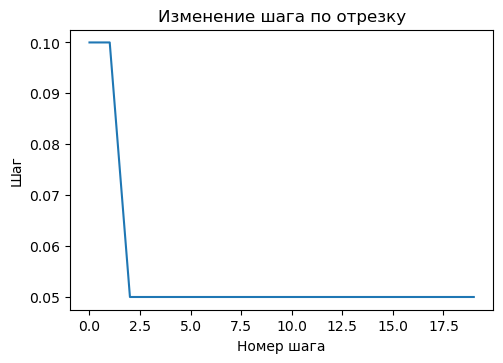

In [21]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.plot(range(len(steps)), steps)
plt.xlabel('Номер шага')
plt.ylabel('Шаг')
plt.title('Изменение шага по отрезку')

### График зависимости минимального шага от заданной точности

Text(0.5, 1.0, 'Зависимость минимального шага от точности')

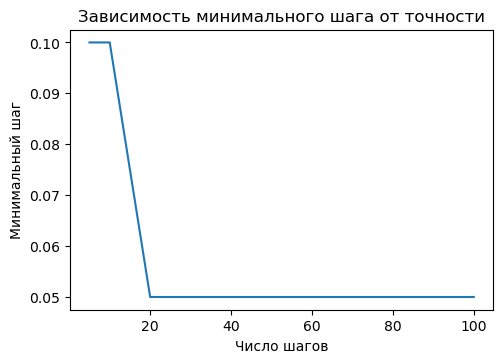

In [22]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 2)
plt.plot(num_steps, min_steps)
plt.xlabel('Число шагов')
plt.ylabel('Минимальный шаг')
plt.title('Зависимость минимального шага от точности')

### График зависимости числа шагов от заданной точности

Text(0.5, 1.0, 'График зависимости числа шагов от заданной точности')

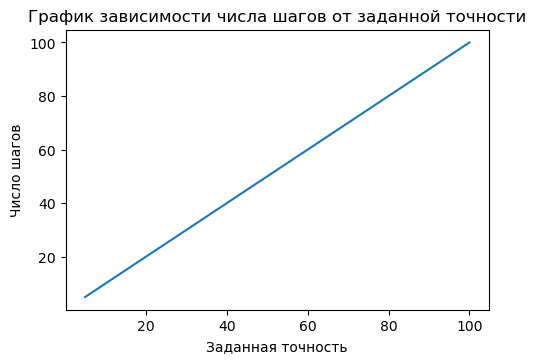

In [23]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 3)
plt.plot(num_steps, num_steps)
plt.xlabel('Заданная точность')
plt.ylabel('Число шагов')
plt.title('График зависимости числа шагов от заданной точности')

### График решения для разных значений заданной точности

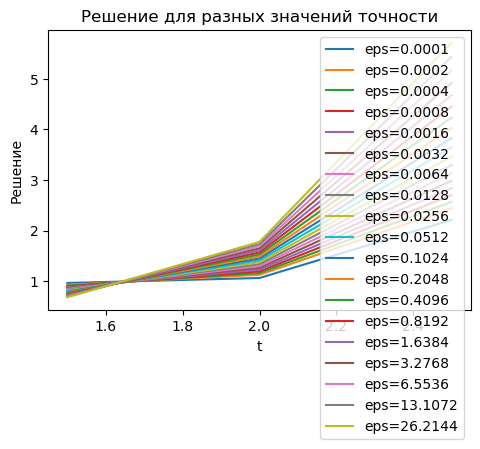

In [24]:
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 4)
t = np.linspace(t_0, T, len(solutions[0]))
for i, sol in enumerate(solutions):
    plt.plot(t, sol, label=f"eps={eps*(2**i):.4f}")
    plt.xlabel('t')
    plt.ylabel('Решение')
    plt.title('Решение для разных значений точности')
    plt.legend()